## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge (study_results, mouse_metadata, how ='inner', on = "Mouse ID")

# Display the data table for preview
combined_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
number_mice = combined_data_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_data_df.loc[combined_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID - 'g989'
duplicate_ID_data= combined_data_df.loc[combined_data_df["Mouse ID"]=='g989']
duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

drug_regimen = combined_data_df.groupby(["Drug Regimen"])
# drug_regimen.count()

# Calculate the mean of the tumor volume for each drug regimen
tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()

# Calculate the median of the tumor volume for each drug regimen
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()

# Calculate the variance of the tumor volume for each drug regimen
tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()

# Calculate the standard deviation of the tumor volume for each drug regimen
tumor_std_dev = drug_regimen["Tumor Volume (mm3)"].std()

# Calculate the SEM of the tumor volume for each drug regimen
tumor_sem = drug_regimen["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,"Median Tumor Volume":tumor_median,"Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_std_dev, "Tumor Volume Std. Err.": tumor_sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function 
# ** .agg() function **

summary_stats_table = combined_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

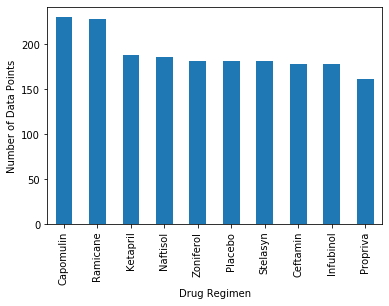

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total = combined_data_df["Drug Regimen"].value_counts()
# total
total.plot(kind = "bar")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()


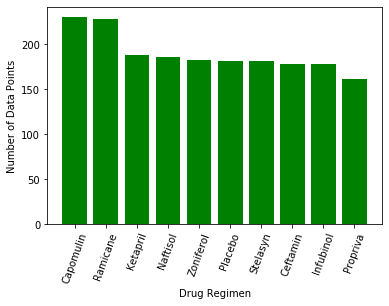

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
total = combined_data_df["Drug Regimen"].value_counts()
# total
x_axis = total.index
y_axis = total.values
plt.bar(x_axis,y_axis, color = 'g')
plt.xticks(rotation = 70)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()


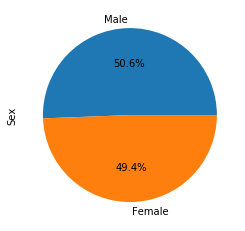

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_mf = combined_data_df["Sex"].value_counts()
# dist_mf.values
dist_mf.plot.pie(y = dist_mf.values, autopct ='%1.1f%%')


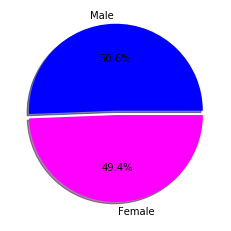

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist_mf = combined_data_df["Sex"].value_counts()
labels = dist_mf.index 
sizes = dist_mf.values
colors = ["blue", "magenta"]
explode = (0.05,0)
plt.pie(sizes, explode = explode,labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True)
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = combined_data_df.groupby("Mouse ID")["Timepoint"].max()
greatest

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merge_df= greatest.merge(combined_data_df,on=["Mouse ID","Timepoint"],how="left")
# merge_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
for name in treatments:
    print(name)

Capomulin
Ramicane
Infubinol
Ceftamin


In [27]:
for key in combined_data_df:
    print(key)

Mouse ID
Timepoint
Tumor Volume (mm3)
Metastatic Sites
Drug Regimen
Sex
Age_months
Weight (g)


In [28]:
for ind, row in combined_data_df.iterrows():
    print (ind,row)

0 Mouse ID                   b128
Timepoint                     0
Tumor Volume (mm3)           45
Metastatic Sites              0
Drug Regimen          Capomulin
Sex                      Female
Age_months                    9
Weight (g)                   22
Name: 0, dtype: object
1 Mouse ID                   b128
Timepoint                     5
Tumor Volume (mm3)      45.6513
Metastatic Sites              0
Drug Regimen          Capomulin
Sex                      Female
Age_months                    9
Weight (g)                   22
Name: 1, dtype: object
2 Mouse ID                   b128
Timepoint                    10
Tumor Volume (mm3)      43.2709
Metastatic Sites              0
Drug Regimen          Capomulin
Sex                      Female
Age_months                    9
Weight (g)                   22
Name: 2, dtype: object
3 Mouse ID                   b128
Timepoint                    15
Tumor Volume (mm3)      43.7849
Metastatic Sites              0
Drug Regimen          Capom

Name: 344, dtype: object
345 Mouse ID                  d474
Timepoint                   10
Tumor Volume (mm3)      46.975
Metastatic Sites             0
Drug Regimen          Ketapril
Sex                       Male
Age_months                  18
Weight (g)                  27
Name: 345, dtype: object
346 Mouse ID                  d474
Timepoint                   15
Tumor Volume (mm3)     47.7779
Metastatic Sites             0
Drug Regimen          Ketapril
Sex                       Male
Age_months                  18
Weight (g)                  27
Name: 346, dtype: object
347 Mouse ID                  d474
Timepoint                   20
Tumor Volume (mm3)     51.7315
Metastatic Sites             0
Drug Regimen          Ketapril
Sex                       Male
Age_months                  18
Weight (g)                  27
Name: 347, dtype: object
348 Mouse ID                  d474
Timepoint                   25
Tumor Volume (mm3)     54.2793
Metastatic Sites             0
Drug Regimen    

Name: 583, dtype: object
584 Mouse ID                  a520
Timepoint                   45
Tumor Volume (mm3)     38.8104
Metastatic Sites             1
Drug Regimen          Ramicane
Sex                       Male
Age_months                  13
Weight (g)                  21
Name: 584, dtype: object
585 Mouse ID                  u196
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Drug Regimen          Ramicane
Sex                       Male
Age_months                  18
Weight (g)                  25
Name: 585, dtype: object
586 Mouse ID                  u196
Timepoint                    5
Tumor Volume (mm3)     45.5575
Metastatic Sites             1
Drug Regimen          Ramicane
Sex                       Male
Age_months                  18
Weight (g)                  25
Name: 586, dtype: object
587 Mouse ID                  u196
Timepoint                   10
Tumor Volume (mm3)     46.4229
Metastatic Sites             1
Drug Regimen    

Name: 819, dtype: object
820 Mouse ID                  k510
Timepoint                   15
Tumor Volume (mm3)     49.6871
Metastatic Sites             1
Drug Regimen          Stelasyn
Sex                     Female
Age_months                   8
Weight (g)                  27
Name: 820, dtype: object
821 Mouse ID                  k510
Timepoint                   20
Tumor Volume (mm3)     52.1056
Metastatic Sites             1
Drug Regimen          Stelasyn
Sex                     Female
Age_months                   8
Weight (g)                  27
Name: 821, dtype: object
822 Mouse ID                  p981
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Drug Regimen          Stelasyn
Sex                       Male
Age_months                  20
Weight (g)                  29
Name: 822, dtype: object
823 Mouse ID                  p981
Timepoint                    5
Tumor Volume (mm3)     47.0006
Metastatic Sites             0
Drug Regimen    

Name: 1052, dtype: object
1053 Mouse ID                   m331
Timepoint                     0
Tumor Volume (mm3)           45
Metastatic Sites              0
Drug Regimen          Zoniferol
Sex                      Female
Age_months                   19
Weight (g)                   26
Name: 1053, dtype: object
1054 Mouse ID                   m331
Timepoint                     5
Tumor Volume (mm3)       45.523
Metastatic Sites              1
Drug Regimen          Zoniferol
Sex                      Female
Age_months                   19
Weight (g)                   26
Name: 1054, dtype: object
1055 Mouse ID                   m331
Timepoint                    10
Tumor Volume (mm3)      47.6469
Metastatic Sites              1
Drug Regimen          Zoniferol
Sex                      Female
Age_months                   19
Weight (g)                   26
Name: 1055, dtype: object
1056 Mouse ID                   m331
Timepoint                    15
Tumor Volume (mm3)      52.1101
Metastatic S

1296 Mouse ID                  a699
Timepoint                   35
Tumor Volume (mm3)     56.5107
Metastatic Sites             1
Drug Regimen          Propriva
Sex                     Female
Age_months                   5
Weight (g)                  28
Name: 1296, dtype: object
1297 Mouse ID                  a699
Timepoint                   40
Tumor Volume (mm3)     58.6054
Metastatic Sites             1
Drug Regimen          Propriva
Sex                     Female
Age_months                   5
Weight (g)                  28
Name: 1297, dtype: object
1298 Mouse ID                  a699
Timepoint                   45
Tumor Volume (mm3)     62.1914
Metastatic Sites             1
Drug Regimen          Propriva
Sex                     Female
Age_months                   5
Weight (g)                  28
Name: 1298, dtype: object
1299 Mouse ID                  k603
Timepoint                    0
Tumor Volume (mm3)          45
Metastatic Sites             0
Drug Regimen          Propriva
Sex

Name: 1542, dtype: object
1543 Mouse ID                  s187
Timepoint                   10
Tumor Volume (mm3)     48.1464
Metastatic Sites             1
Drug Regimen          Propriva
Sex                       Male
Age_months                  22
Weight (g)                  25
Name: 1543, dtype: object
1544 Mouse ID                  s187
Timepoint                   15
Tumor Volume (mm3)     52.0816
Metastatic Sites             1
Drug Regimen          Propriva
Sex                       Male
Age_months                  22
Weight (g)                  25
Name: 1544, dtype: object
1545 Mouse ID                  s187
Timepoint                   20
Tumor Volume (mm3)     53.7447
Metastatic Sites             1
Drug Regimen          Propriva
Sex                       Male
Age_months                  22
Weight (g)                  25
Name: 1545, dtype: object
1546 Mouse ID                  s187
Timepoint                   25
Tumor Volume (mm3)     56.4852
Metastatic Sites             1
Drug Reg

Name: 1791, dtype: object
1792 Mouse ID                   i738
Timepoint                    35
Tumor Volume (mm3)       36.176
Metastatic Sites              1
Drug Regimen          Capomulin
Sex                      Female
Age_months                   23
Weight (g)                   20
Name: 1792, dtype: object
1793 Mouse ID                   i738
Timepoint                    40
Tumor Volume (mm3)      36.8439
Metastatic Sites              2
Drug Regimen          Capomulin
Sex                      Female
Age_months                   23
Weight (g)                   20
Name: 1793, dtype: object
1794 Mouse ID                   i738
Timepoint                    45
Tumor Volume (mm3)      37.3118
Metastatic Sites              2
Drug Regimen          Capomulin
Sex                      Female
Age_months                   23
Weight (g)                   20
Name: 1794, dtype: object
1795 Mouse ID                   r944
Timepoint                     0
Tumor Volume (mm3)           45
Metastatic S

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
  
# .append()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
